Confusion Matrix:
 [[11269   138]
 [  552   878]]
Accuracy Score: 0.9462491236270156
Model Coefficients:
 [[0.05294228 0.09039665 2.33620439 0.03332892]]
Mean Squared Error (MSE): 0.05375087637298434
R-squared (R²): 0.45699334416788595


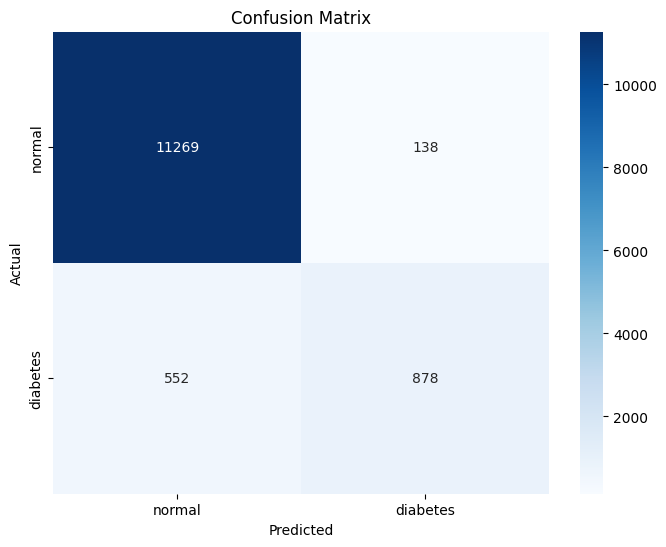


Classification Report:
               precision    recall  f1-score   support

      normal       0.95      0.99      0.97     11407
    diabetes       0.86      0.61      0.72      1430

    accuracy                           0.95     12837
   macro avg       0.91      0.80      0.84     12837
weighted avg       0.94      0.95      0.94     12837



In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the modified data
modify_data = pd.read_csv("./modify_data.csv")

# Select features and target variable
# X = modify_data[['smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]  
X = modify_data[[ 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]  
y = modify_data['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Initialize the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
coefficients = model.coef_
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)
print("Model Coefficients:\n", coefficients)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Visualizing the Confusion Matrix
labels = ['normal', 'diabetes']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print("\nClassification Report:\n", report)

